In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, roc_curve, auc

import seaborn as sns
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings('ignore')


Bad key "nbagg.transparent" on line 426 in
/home/yaroslav/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.2.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key "animation.mencoder_path" on line 509 in
/home/yaroslav/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.2.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key "animation.mencoder_args" on line 512 in
/home/yaroslav/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.2.2/matplotlibrc.template
or from the matplotlib source distribution
In /home/yarosla

In [2]:
pd.set_option('display.max.rows', None)

In [3]:
data = pd.read_csv('2_7.csv', header=None, sep=';')

In [4]:
data.shape

(336, 8)

In [5]:
data.head()

,0,1,2,3,4,5,6,7
0,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp


In [6]:
data.columns = ['feature_{}'.format(str(i)) for i in range(7)] + ['target']

In [7]:
data.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,target
0,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp


In [8]:
data.target.value_counts(normalize=True)

cp     0.425595
im     0.229167
pp     0.154762
imU    0.104167
om     0.059524
omL    0.014881
imL    0.005952
imS    0.005952
Name: target, dtype: float64

In [9]:
data.target.nunique()

8

### 1) Check missing values

In [10]:
data.target.hasnans

False

In [11]:
features_list = ['feature_{}'.format(str(i)) for i in range(7)]

In [12]:
for feature in features_list:
    print(feature, data[feature].hasnans)

feature_0 False
feature_1 False
feature_2 False
feature_3 False
feature_4 False
feature_5 False
feature_6 False


In [13]:
data[data.isnull()].dropna().empty

True

No missing values in dataset

### 2) Basic exploratory data analysis

In [14]:
data.head(3)

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,target
0,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp


In [15]:
data.feature_6.nunique()

77

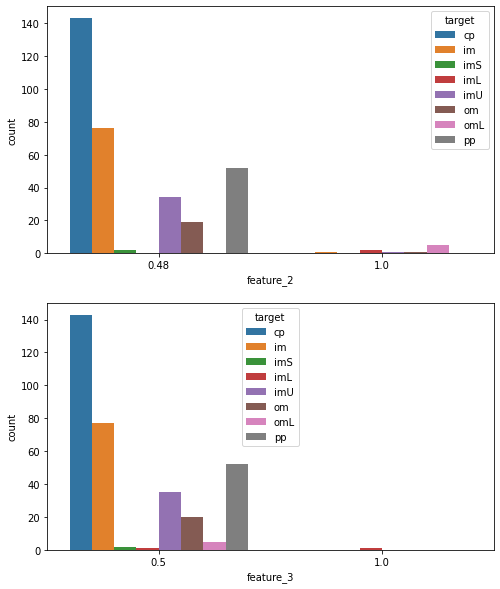

In [16]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))


for i, feature in enumerate(['feature_2', 'feature_3']):
    sns.countplot(x=feature, hue='target', data=data, ax=axs[i]);

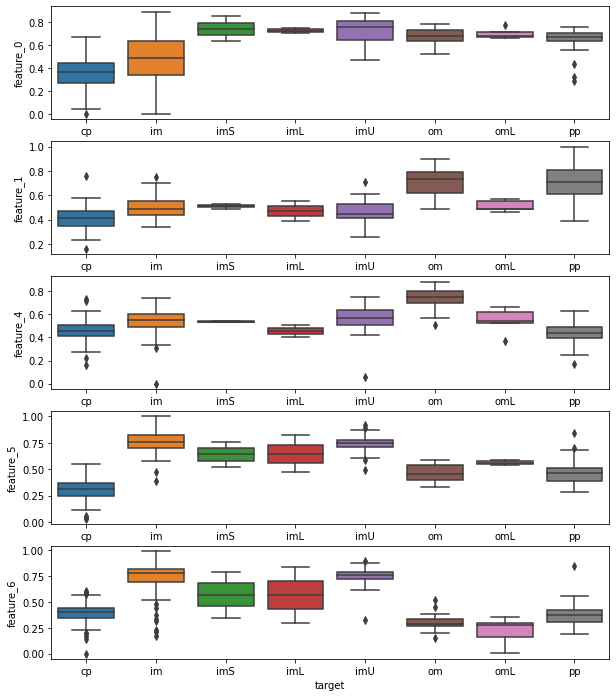

In [17]:
fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(10, 12))


for i, feature in enumerate(['feature_0', 'feature_1', 'feature_4', 'feature_5', 'feature_6']):
    sns.boxplot(x='target', y=feature, data=data, ax=axs[i]);

### 3) Categorical target to numeric

In [18]:
label_encoder = LabelEncoder()

In [19]:
data['encoded_target'] = label_encoder.fit_transform(data['target'])

In [20]:
data.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,target,encoded_target
0,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp,0
1,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp,0
2,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp,0
3,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp,0
4,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp,0


In [21]:
data.encoded_target.value_counts(normalize=True)

0    0.425595
1    0.229167
7    0.154762
4    0.104167
5    0.059524
6    0.014881
3    0.005952
2    0.005952
Name: encoded_target, dtype: float64

In [22]:
data.target.value_counts(normalize=True)

cp     0.425595
im     0.229167
pp     0.154762
imU    0.104167
om     0.059524
omL    0.014881
imL    0.005952
imS    0.005952
Name: target, dtype: float64

In [23]:
data.target.unique()

array(['cp', 'im', 'imS', 'imL', 'imU', 'om', 'omL', 'pp'], dtype=object)

### 4) Fit models

### Baseline models

In [24]:
models_titles = ('NaiveBayesGaussianNB', 'NaiveBayesBernoulliNB', 'NaiveBayesMultinomialNB',
                'GradientBoostingClassifier', 'SVC')

models = (GaussianNB(), BernoulliNB(), MultinomialNB(), GradientBoostingClassifier(random_state=42),
          SVC(probability=True, random_state=42))

split_parameters = ((60, 40), (70, 30), (80, 20), (90, 10))

class_labels = data['target'].unique()

In [25]:
def get_metrics_baseline(models, models_titles, split_parameters, class_labels):
    
    index = pd.MultiIndex.from_product((models_titles, list(map(str, split_parameters)), class_labels))
    
    models_results = pd.DataFrame(index=index)
    models_results.index.names = ['model', 'split', 'target']
    
    for model, model_title in zip(models, models_titles):
        for data_split_sizes in split_parameters:
            train_size, test_size = data_split_sizes

            train, test = train_test_split(data, train_size=train_size, test_size=test_size, random_state=42,
                                          stratify=data['target'])


            model.fit(train[features_list], train['target'])

            report_dict = classification_report(test['target'], model.predict(test[features_list]), 
                                                output_dict=True)
            report = pd.DataFrame(report_dict).T

            for class_label in class_labels:
                fpr, tpr, thresholds = roc_curve(test['target'],
                                                 model.predict_proba(test[features_list])[:,1],
                                                 pos_label=class_label) 

                auroc = auc(fpr, tpr)

                models_results.loc[(model_title, str(data_split_sizes), class_label), 'auc'] = auroc

                for metric in ('precision', 'recall', 'f1-score'):
                    try:
                        models_results.loc[(model_title, str(data_split_sizes), class_label), 
                                           metric] = report.loc[class_label, metric]
                    except KeyError:
                        models_results.loc[(model_title, str(data_split_sizes), class_label), 
                                           metric] = None
    return models_results

In [26]:
models_results = get_metrics_baseline(models, models_titles, split_parameters, class_labels)

In [27]:
models_results

auc  precision    recall  \
model                      split    target                                  
NaiveBayesGaussianNB       (60, 40) cp      0.329923   0.842105  0.941176   
                                    im      0.906810   0.700000  0.777778   
                                    imS          NaN        NaN       NaN   
                                    imL          NaN        NaN       NaN   
                                    imU     0.861111   0.500000  0.250000   
                                    om      0.252252   1.000000  0.666667   
                                    omL     0.000000   1.000000  1.000000   
                                    pp      0.245098   0.666667  0.666667   
                           (70, 30) cp      0.285068   0.800000  0.923077   
                                    im      0.913043   0.714286  0.714286   
                                    imS          NaN        NaN       NaN   
                                    imL          NaN        NaN       NaN   
                                    imU     0.827160   0.500000  0.333333   
                                    om      0.035714   1.000000  1.000000   
                                    omL          NaN        NaN       NaN   
                                    pp      0.344000   0.750000  0.600000   
                           (80, 20) cp      0.262626   0.750000  1.000000   
                                    im      0.880000   0.750000  0.600000   
                                    imS          NaN        NaN       NaN   
                                    imL          NaN        NaN       NaN   
                                    imU     0.833333   0.500000  0.500000   
                                    om      0.000000   1.000000  1.000000   
                                    omL          NaN        NaN       NaN   
                                    pp      0.352941   1.000000  0.333333   
                           (90, 10) cp      0.500000   0.666667  1.000000   
                                    im      0.750000   0.000000  0.000000   
                                    imS          NaN        NaN       NaN   
                                    imL          NaN        NaN       NaN   
                                    imU     1.000000   0.500000  1.000000   
                                    om      0.000000   1.000000  1.000000   
                                    omL          NaN        NaN       NaN   
                                    pp      0.250000   1.000000  0.500000   
NaiveBayesBernoulliNB      (60, 40) cp      0.500000   0.425000  1.000000   
                                    im      0.500000   0.000000  0.000000   
                                    imS          NaN        NaN       NaN   
                                    imL          NaN        NaN       NaN   
                                    imU     0.500000   0.000000  0.000000   
                                    om      0.500000   0.000000  0.000000   
                                    omL     0.500000   0.000000  0.000000   
                                    pp      0.500000   0.000000  0.000000   
                           (70, 30) cp      0.500000   0.433333  1.000000   
                                    im      0.500000   0.000000  0.000000   
                                    imS          NaN        NaN       NaN   
                                    imL          NaN        NaN       NaN   
                                    imU     0.500000   0.000000  0.000000   
                                    om      0.500000   0.000000  0.000000   
                                    omL          NaN        NaN       NaN   
                                    pp      0.500000   0.000000  0.000000   
                           (80, 20) cp      0.500000   0.450000  1.000000   
                                    im      0.500000   0.000000  0.000000   
                                    imS      

### Fit models

#### parameters for SVC

In [28]:
svc_kernels = ('linear', 'poly', 'rbf', 'sigmoid', 'precomputed')
svc_C = np.array([pow(10, x) for x in range(-2, 2)])
svc_degrees = np.arange(2, 6)

#### parameters for Gradient Boosting

In [29]:
n_estimators = np.arange(100, 500, 100)
max_depth = [3, 5, 7]
max_features = ['auto', 'sqrt', 'log2']
max_leaf_nodes = [7, 10, 20]
min_samples_leaf = [7, 10, 20]
min_samples_split = [7, 10, 20]
learning_rate = np.array([pow(10, x) for x in range(-2, 2)])

### GridSearch

In [30]:
svc_grid = {'kernel': svc_kernels, 'C': svc_C, 'degree': svc_degrees}
gradient_boosting_grid = {'n_estimators': n_estimators, 'max_depth': max_depth, 'max_features':max_features,
                         'max_leaf_nodes': max_leaf_nodes, 'min_samples_leaf': min_samples_leaf,
                         'min_samples_split': min_samples_split, 'learning_rate': learning_rate
                         }

In [31]:
svc_grid_search = GridSearchCV(SVC(random_state=42, probability=True), svc_grid, 
                               scoring='f1_macro', 
                               cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42))

gradient_boosting_grid_search = GridSearchCV(GradientBoostingClassifier(random_state=42),
                                             gradient_boosting_grid, 
                                             scoring='f1_macro', 
                                             cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
                                            )

In [32]:
def get_metrics_fit(models, models_titles, split_parameters, class_labels, grid_search):
    
    index = pd.MultiIndex.from_product((models_titles, list(map(str, split_parameters)), class_labels))
    
    models_results = pd.DataFrame(index=index)
    models_results.index.names = ['model', 'split', 'target']
    
    for model, model_title, grid in zip(models, models_titles, grid_search):
        for data_split_sizes in split_parameters:
            train_size, test_size = data_split_sizes

            train, test = train_test_split(data, train_size=train_size, test_size=test_size, random_state=42,
                                          stratify=data['target'])


            grid.fit(train[features_list], train['target'])
            best_params = grid.best_params_
            model = model(**best_params)

            report_dict = classification_report(test['target'], model.predict(test[features_list]), 
                                                output_dict=True)
            report = pd.DataFrame(report_dict).T

            for class_label in class_labels:
                fpr, tpr, thresholds = roc_curve(test['target'],
                                                 model.predict_proba(test[features_list])[:,1],
                                                 pos_label=class_label) 

                auroc = auc(fpr, tpr)

                models_results.loc[(model_title, str(data_split_sizes), class_label), 'auc'] = auroc

                for metric in ('precision', 'recall', 'f1-score'):
                    try:
                        models_results.loc[(model_title, str(data_split_sizes), class_label), 
                                           metric] = report.loc[class_label, metric]
                    except KeyError:
                        models_results.loc[(model_title, str(data_split_sizes), class_label), 
                                           metric] = None
    return models_results

In [33]:
models_to_fit = (GradientBoostingClassifier, SVC)
models_titles_to_fit = ('GradientBoostingClassifier', 'SVC')
grid_searhers = (gradient_boosting_grid_search, svc_grid_search)

In [ ]:
%%time
models_results_fitted = get_metrics_fit(models, models_titles, split_parameters,
                                        class_labels, grid_searhers)